# 3. Data Preprocessing and Feature Engineering

In [6]:
a360ai

<A360 AI Interface for project: use-case-logistics>

In [7]:
# Get default data repo
DATAREPO_LIST = a360ai.list_datarepos()
DATAREPO = DATAREPO_LIST['name'][0]
DATAREPO

'use-case-logistics'

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

## 1. Set Default Data Repo and load data

In [9]:
a360ai.set_default_datarepo(DATAREPO)

In [10]:
a360ai.list_datasets()

,base_name,extension,size
0,data_traffic_congestion_2020.csv,csv,36377405


In [11]:
data = a360ai.load_dataset('data_traffic_congestion_2020.csv')

In [12]:
data.head()

,Date,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Holiday,Special_Condition,Starting_Location,Sys_Time,Weather,Data_prediction
0,13/02/2020,Thursday,9th_avenue,1000,Jinnah Avenue,60,no,no,capital_gymkhana,0:00:01,Showers,smooth
1,13/02/2020,Thursday,centaurus,1300,Jinnah Avenue,120,no,no,9th_avenue,0:00:09,Showers,highly congested
2,13/02/2020,Thursday,crown_plaza,1000,Jinnah Avenue and Faisal Avenue Flyover,60,no,no,centaurus,0:00:17,Showers,smooth
3,13/02/2020,Thursday,roshan_plaza,2700,Jinnah Ave,180,no,no,crown_plaza,0:00:24,Showers,smooth
4,13/02/2020,Thursday,salt_and_pepper,3900,Jinnah Ave,300,no,no,roshan_plaza,0:00:31,Showers,slightly congested


#### Creating features for Date

In [13]:
data['Date'] = pd.to_datetime(data.Date, format='%d/%m/%Y')

In [14]:
#defining the fucntion
def create_date_features(df):
    df['month'] = df.Date.dt.month
    df['day_of_month'] = df.Date.dt.day
    df['day_of_year'] = df.Date.dt.dayofyear
    df['week_of_year'] = df.Date.dt.weekofyear
    df['year'] = df.Date.dt.year
    #check
    df["is_wknd"] = df.Date.dt.weekday // 4
    df['is_month_start'] = df.Date.dt.is_month_start.astype(int)
    df['is_month_end'] = df.Date.dt.is_month_end.astype(int)
    return df

In [15]:
#convertig to category reduces data space required
data["Destination_Location"]=data["Destination_Location"].astype("category")
data["Day"]=data["Day"].astype("category")
data["Fastest_Route_Name"]=data["Fastest_Route_Name"].astype("category")
data["Starting_Location"]=data["Starting_Location"].astype("category")
data["Weather"]=data["Weather"].astype("category")


In [16]:
data = create_date_features(data)

/tmp/ipykernel_132/510484872.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df.Date.dt.weekofyear


In [17]:
data

,Date,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Holiday,Special_Condition,Starting_Location,Sys_Time,Weather,Data_prediction,month,day_of_month,day_of_year,week_of_year,year,is_wknd,is_month_start,is_month_end
0,2020-02-13,Thursday,9th_avenue,1000,Jinnah Avenue,60,no,no,capital_gymkhana,0:00:01,Showers,smooth,2,13,44,7,2020,0,0,0
1,2020-02-13,Thursday,centaurus,1300,Jinnah Avenue,120,no,no,9th_avenue,0:00:09,Showers,highly congested,2,13,44,7,2020,0,0,0
2,2020-02-13,Thursday,crown_plaza,1000,Jinnah Avenue and Faisal Avenue Flyover,60,no,no,centaurus,0:00:17,Showers,smooth,2,13,44,7,2020,0,0,0
3,2020-02-13,Thursday,roshan_plaza,2700,Jinnah Ave,180,no,no,crown_plaza,0:00:24,Showers,smooth,2,13,44,7,2020,0,0,0
4,2020-02-13,Thursday,salt_and_pepper,3900,Jinnah Ave,300,no,no,roshan_plaza,0:00:31,Showers,slightly congested,2,13,44,7,2020,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317107,2020-02-29,Saturday,IJP road,4400,Murree Rd and I.J.P. Road,540,no,no,mehran hotel,23:57:23,Mostly Cloudy,slightly congested,2,29,60,9,2020,1,0,1
317108,2020-02-29,Saturday,Jamia Masjid Bilal,1000,I.J.P. Road,180,no,no,IJP road,23:57:36,Mostly Cloudy,congested,2,29,60,9,2020,1,0,1
317109,2020-02-29,Saturday,eventox_event_management,1000,Sufi Tabasum Rd and Service Rd W,120,no,no,STroad_start_stop,23:57:46,Mostly Cloudy,highly congested,2,29,60,9,2020,1,0,1
317110,2020-02-29,Saturday,Al_hateem_palace,1100,Service Rd South I 8,120,no,no,IJP_metro,23:58:18,Mostly Cloudy,highly congested,2,29,60,9,2020,1,0,1


### Removing outliers

In [18]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [19]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, numerical_col)

#### Reducing Number of Disntinct Unique values in Data Prediction

In [20]:
data.Data_prediction.unique()

array(['smooth', 'highly congested', 'slightly congested', 'congested',
       'blockage'], dtype=object)

We notice that our target variable has 5 unique values and since we are only keen about identifying weather the traffic is congested or smooth, we will convert the values of "highly congested", "slightly congested", "congested", "blockage" to just being "congested"

In [21]:
congested = [ "highly congested", "slightly congested", "congested", "blockage"]
smooth = ["smooth"]

def reduce_marital_status(x):
    if x in congested:
        return "congested"
    elif x in smooth:
        return "smooth"
    else:
        return x

In the line above, a function has been created to change the features listed in congested and smooth above to replace the exisiting names with "congested" and "smooth"
This is done to have two target variables instead of 5

In [22]:
data.head()

,Date,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Holiday,Special_Condition,Starting_Location,Sys_Time,Weather,Data_prediction,month,day_of_month,day_of_year,week_of_year,year,is_wknd,is_month_start,is_month_end
0,2020-02-13,Thursday,9th_avenue,1000.0,Jinnah Avenue,60.0,no,no,capital_gymkhana,0:00:01,Showers,smooth,2,13,44,7,2020,0,0,0.0
1,2020-02-13,Thursday,centaurus,1300.0,Jinnah Avenue,120.0,no,no,9th_avenue,0:00:09,Showers,highly congested,2,13,44,7,2020,0,0,0.0
2,2020-02-13,Thursday,crown_plaza,1000.0,Jinnah Avenue and Faisal Avenue Flyover,60.0,no,no,centaurus,0:00:17,Showers,smooth,2,13,44,7,2020,0,0,0.0
3,2020-02-13,Thursday,roshan_plaza,2500.0,Jinnah Ave,180.0,no,no,crown_plaza,0:00:24,Showers,smooth,2,13,44,7,2020,0,0,0.0
4,2020-02-13,Thursday,salt_and_pepper,2500.0,Jinnah Ave,270.0,no,no,roshan_plaza,0:00:31,Showers,slightly congested,2,13,44,7,2020,0,0,0.0


In [23]:
data.Data_prediction = data.Data_prediction.apply(reduce_marital_status)

In [24]:
data.Data_prediction.unique()

array(['smooth', 'congested'], dtype=object)

We see that now our target variable congested has 2 unique variables instead of 5 earlier

### One Hot Encoding

We one hot encode the categroical values to convert them to intergers. <br> They unique values represented by 0 and 1, although this creates 128 new columns, this is insignificant compared to the 317112 rows in our dataset.

In [25]:
data.shape

(317112, 20)

In [26]:
data = pd.get_dummies(data, columns=['Destination_Location','Day','Fastest_Route_Name','Starting_Location','Weather'])
data.head()

,Date,Fastest_Route_Distance,Fastest_Route_Time,Holiday,Special_Condition,Sys_Time,Data_prediction,month,day_of_month,day_of_year,...,Starting_Location_zaman_khan_khokha,Weather_Clear,Weather_Cloudy,Weather_Mostly Clear,Weather_Mostly Cloudy,Weather_Mostly Sunny,Weather_Partly Cloudy,Weather_Rain,Weather_Showers,Weather_Sunny
0,2020-02-13,1000.0,60.0,no,no,0:00:01,smooth,2,13,44,...,0,0,0,0,0,0,0,0,1,0
1,2020-02-13,1300.0,120.0,no,no,0:00:09,congested,2,13,44,...,0,0,0,0,0,0,0,0,1,0
2,2020-02-13,1000.0,60.0,no,no,0:00:17,smooth,2,13,44,...,0,0,0,0,0,0,0,0,1,0
3,2020-02-13,2500.0,180.0,no,no,0:00:24,smooth,2,13,44,...,0,0,0,0,0,0,0,0,1,0
4,2020-02-13,2500.0,270.0,no,no,0:00:31,congested,2,13,44,...,0,0,0,0,0,0,0,0,1,0


In [27]:
data.shape

(317112, 148)

We notice that the new colums have now been created by looking the the head and shape of the data

In [28]:
data.drop(["Holiday","Special_Condition","Sys_Time","Date"], axis = 1, inplace = True)

These columns are dropped as: <br>1. Holiday and Special_Condition do not have any unique values <br>2. Sys_Time is not neccesary in the dataset for the model we are building <br>3. Date was converted into having new columns representing the other features such as day which we described a function for above

### Fixing Imbalance in Target variable by under sampling

In [29]:
# class count
class_count_congested, class_count_smooth = data['Data_prediction'].value_counts()

# Separate class
class_congested = data[data['Data_prediction'] == "congested"]
class_smooth = data[data['Data_prediction'] == "smooth"]# print the shape of the class
print('class congested:', class_congested.shape)
print('class smooth:', class_smooth.shape)

class congested: (178285, 144)
class smooth: (138827, 144)


We notice that there are 178285 rows in class congested and 138827 in class smooth. <br> This shows us that there is an imbalance in the data available. <br> To fix this issue we undersample

total class of smooth and congested: congested    138827
smooth       138827
Name: Data_prediction, dtype: int64


<AxesSubplot:title={'center':'count (Data_prediction)'}>

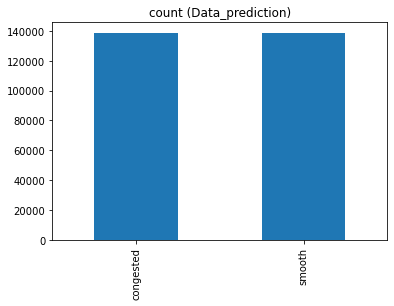

In [30]:
class_congested_under = class_congested.sample(class_count_smooth)

data = pd.concat([class_congested_under, class_smooth], axis=0)

print("total class of smooth and congested:",data['Data_prediction'].value_counts())# plot the count after under-sampeling
data['Data_prediction'].value_counts().plot(kind='bar', title='count (Data_prediction)')

In [31]:
data.shape

(277654, 144)

We notice now that the data we have is balanced in terms of the target variables

In [32]:
data['Data_prediction'] = data['Data_prediction'].replace(['smooth','congested'],[0,1])

In [33]:
data.head()

,Fastest_Route_Distance,Fastest_Route_Time,Data_prediction,month,day_of_month,day_of_year,week_of_year,year,is_wknd,is_month_start,...,Starting_Location_zaman_khan_khokha,Weather_Clear,Weather_Cloudy,Weather_Mostly Clear,Weather_Mostly Cloudy,Weather_Mostly Sunny,Weather_Partly Cloudy,Weather_Rain,Weather_Showers,Weather_Sunny
264057,1000.0,270.0,1,2,18,49,8,2020,0,0,...,0,0,0,0,0,0,1,0,0,0
10901,2500.0,270.0,1,2,15,46,7,2020,1,0,...,0,0,0,0,0,0,0,0,0,1
100937,1300.0,120.0,1,2,23,54,8,2020,1,0,...,0,1,0,0,0,0,0,0,0,0
107981,1000.0,120.0,1,2,24,55,9,2020,0,0,...,0,1,0,0,0,0,0,0,0,0
191692,1100.0,120.0,1,2,16,47,7,2020,1,0,...,0,0,0,1,0,0,0,0,0,0


In [34]:
data.Data_prediction.unique()

array([1, 0])

In [35]:
data['Data_prediction'].dtypes

dtype('int64')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277654 entries, 264057 to 317111
Columns: 144 entries, Fastest_Route_Distance to Weather_Sunny
dtypes: float64(3), int64(8), uint8(133)
memory usage: 60.6 MB


### Export Data for Model Training

In [37]:
X = data.drop(["Data_prediction"], axis=1)
y = data["Data_prediction"]

In [38]:
X.columns

Index(['Fastest_Route_Distance', 'Fastest_Route_Time', 'month', 'day_of_month',
       'day_of_year', 'week_of_year', 'year', 'is_wknd', 'is_month_start',
       'is_month_end',
       ...
       'Starting_Location_zaman_khan_khokha', 'Weather_Clear',
       'Weather_Cloudy', 'Weather_Mostly Clear', 'Weather_Mostly Cloudy',
       'Weather_Mostly Sunny', 'Weather_Partly Cloudy', 'Weather_Rain',
       'Weather_Showers', 'Weather_Sunny'],
      dtype='object', length=143)

## Write dataaset to Data Repo

In [39]:
a360ai.write_dataset(X,"X", overwrite=True)
a360ai.write_dataset(y,"y", overwrite=True)

True